https://app.cryosphereinnovation.com/sbd_data/SIMB3_443910.csv
https://app.cryosphereinnovation.com/sbd_data/SIMB3_441910.csv


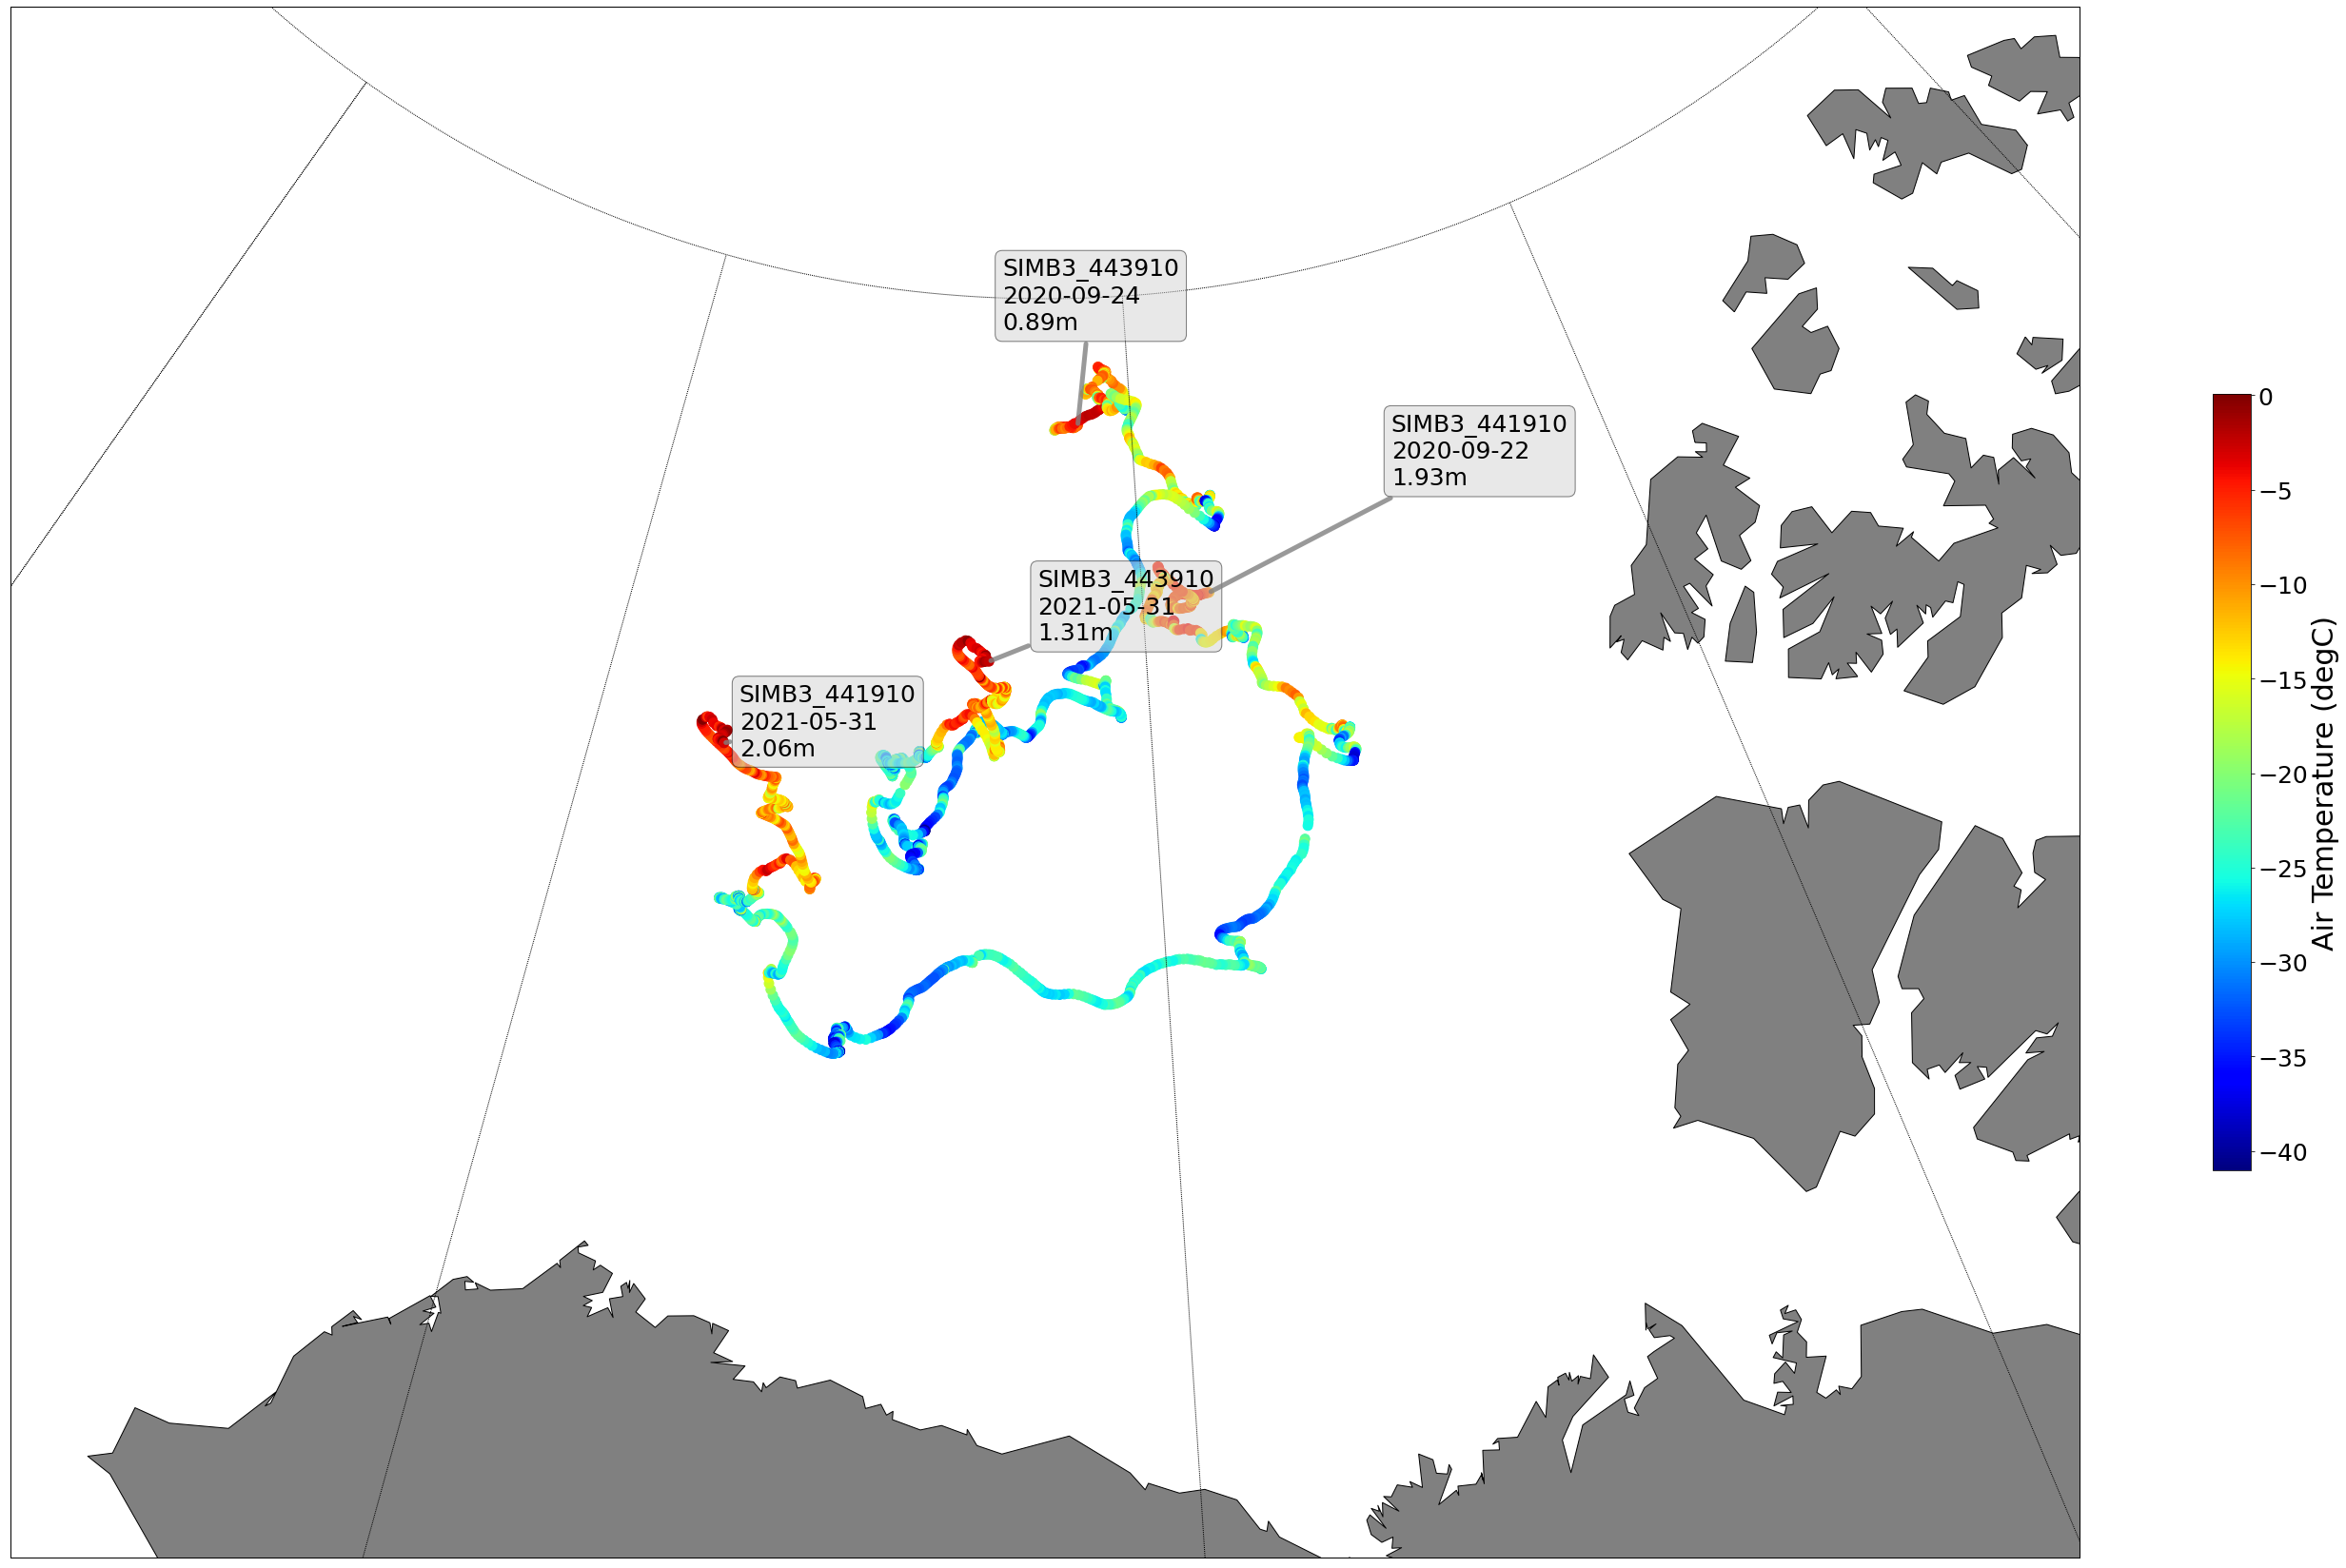

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
import matplotlib.cm as cm
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from adjustText import adjust_text
import pandas as pd
from datetime import date




def cast_to_map(simb_df):
    
    fig, ax = plt.subplots(figsize=(50,30))
    
    
       
    def create_map_centre():
    
        lons=simb_df['longitude'].values.tolist()
        centre_lon=np.mean(lons)
        lats=simb_df['latitude'].values.tolist()
        centre_lat=np.mean(lats)
        
        return lons, lats, centre_lon, centre_lat
    
               
    
    def create_map_template():
        
        zoom=1
    
        m = Basemap(projection='stere',lat_0=centre_lat, lon_0=centre_lon,  lat_ts=centre_lat,resolution='l', width=2000000/zoom, height=1500000/zoom,ax=ax)
        x_values, y_values = m(lons,lats)

        m.fillcontinents(color='gray',lake_color='gray')
        m.drawcoastlines()
        m.drawparallels(np.arange(-80.,81.,20.))
        m.drawmeridians(np.arange(-180.,181.,20.))
        m.drawmapboundary(fill_color='white')
       
        return m, x_values, y_values 
    
    
    def create_map_labels():
        
        
        
        
        buoys_list=simb_df['buoy_id'].values.tolist()
        buoys= list(set(buoys_list))


        labels_df=[]

        for buoy in buoys:
            cut = simb_df[simb_df['buoy_id']==buoy]
            deployment_date= cut.head(1)
            current_date= cut.tail(1)
            labels_df.append(deployment_date)
            labels_df.append(current_date)

        labels_df=pd.concat(labels_df)
        labels_df




        
        buoy_labels=labels_df['buoy_id'].values.tolist()
        date_labels=labels_df['date'].dt.date.tolist()
        ice_thickness_labels=labels_df['ice_thickness'].values.tolist()
        
        lons=labels_df['longitude'].values.tolist()
        lats=labels_df['latitude'].values.tolist()
        x_labels, y_labels=m(lons, lats)

        
        date_and_thickness_labels=[]
    
        for buoyid,date,ice in zip(buoy_labels,date_labels,ice_thickness_labels):
            full_label=(buoyid + '\n' + str(date)+ '\n' + str(round(ice,2)) + 'm')
        
            date_and_thickness_labels.append(full_label)
            
        
        
        
        
    
    
        return x_labels, y_labels, date_and_thickness_labels
 


    def produce_final_figure():
        
        colours=simb_df['air_temp'].values.tolist()
    
    
    
    
    

        final_figure=m.scatter(x_values, y_values,100,c=colours,ax=ax,cmap='jet')
    
        final_figure_labels=[]

        for (x,y, label) in zip(x_labels, y_labels, date_and_thickness_labels):

            t=ax.text(x, y, label,color='black', ha='center', size=25,
             bbox=dict(boxstyle="round", facecolor='lightgrey', alpha=0.5 ))
            
            final_figure_labels.append(t)


        adjust_text(final_figure_labels, ax=ax, precision=0.001,
        expand_text=(2.01, 2.05), expand_points=(2.01, 2.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='gray', lw=5, alpha=.8),ha='right')
    
    
        cbar=plt.colorbar(final_figure,shrink=0.5,ax=ax)
        cbar.set_label("Air Temperature (degC)",size=30)
        cbar.ax.tick_params(labelsize=25) 
        
        return fig
    
    


    lons, lats, centre_lon, centre_lat= create_map_centre()
    m, x_values, y_values = create_map_template()
    x_labels, y_labels, date_and_thickness_labels = create_map_labels()
    fig= produce_final_figure()
    
    plt.savefig('ap_test_map.png')
    plt.show()
    

    
    
    


def fetch_and_map_data():

    
    urls=['https://app.cryosphereinnovation.com/sbd_data/SIMB3_443910.csv',
         #'https://app.cryosphereinnovation.com/sbd_data/SIMB3_859790.csv',
         'https://app.cryosphereinnovation.com/sbd_data/SIMB3_441910.csv']
    
    
    frames=[]
    
    for url in urls:
        
        
        print(url)
        try:

            simb_df = pd.read_csv(url) 
            buoy_id= url.split('/')[-1].rstrip('.csv')
            simb_df=simb_df[simb_df['wdt_counter']>2]
            simb_df['buoy_id']=buoy_id

        except invalid_link:
            print('Invalid link, please check link address (right click on "download csv" and copy link')

        initial_snow_depth=0.2
        initial_surface_distance=simb_df['surface_distance'].values.tolist()[0]


        height_above_ice = initial_surface_distance + initial_snow_depth


        simb_df['snow_depth']=height_above_ice - simb_df['surface_distance'] 
        simb_df['ice_thickness']= 4.05- height_above_ice - simb_df['bottom_distance']


        simb_df['time_stamp']=simb_df['time_stamp'].round(0)
        simb_df['date']=pd.TimedeltaIndex(simb_df['time_stamp'],unit='d')+pd.to_datetime('1900-01-01')
        
        frames.append(simb_df)

        
        
    simb_df_full=pd.concat(frames,ignore_index=True)

    
    cast_to_map(simb_df_full)

fetch_and_map_data()


In [ ]:
# check clean install of basemap functions properly
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
import matplotlib.cm as cm
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from adjustText import adjust_text
import pandas as pd
from datetime import date




def cast_to_map(simb_df):
    #create large map fig
    fig, ax = plt.subplots(figsize=(50,30))
    
    
       
    def create_map_centre():
        #list all lons and lats and create mean of both to generate map centre automatically
        lons=simb_df['longitude'].values.tolist()
        centre_lon=np.mean(lons)
        lats=simb_df['latitude'].values.tolist()
        centre_lat=np.mean(lats)
        
        return lons, lats, centre_lon, centre_lat
    
               
    
    def create_map_template():
        #added zoom variable so users can easily change zoom
        zoom=1
        #steric projection onto basemap, width and height are in metres
        m = Basemap(projection='stere',lat_0=centre_lat, lon_0=centre_lon,  lat_ts=centre_lat,resolution='l', width=2000000/zoom, height=1500000/zoom,ax=ax)
        x_values, y_values = m(lons,lats)
        #visual changes to basemap, draws coastlines and meridians,parralels onto mop at appropriate coords
        m.fillcontinents(color='gray',lake_color='gray')
        m.drawcoastlines()
        m.drawparallels(np.arange(-80.,81.,20.))
        m.drawmeridians(np.arange(-180.,181.,20.))
        m.drawmapboundary(fill_color='white')
       
        return m, x_values, y_values 
    
    
    def create_map_labels():
        
        
        
        #create list of buoy ids
        buoys_list=simb_df['buoy_id'].values.tolist()
        #get unique strings
        buoys= list(set(buoys_list))

        #empty list for append
        labels_df=[]

        for buoy in buoys:
            #subset dataframe to buoys
            cut = simb_df[simb_df['buoy_id']==buoy]
            #get deployment row and current row, add these to labels_df
            deployment_date= cut.head(1)
            current_date= cut.tail(1)
            labels_df.append(deployment_date)
            labels_df.append(current_date)
        #create df proper from this
        labels_df=pd.concat(labels_df)
        labels_df




        #list of buoy ids
        buoy_labels=labels_df['buoy_id'].values.tolist()
        #list of dates in datetime
        date_labels=labels_df['date'].dt.date.tolist()
        #list of ice thickness
        ice_thickness_labels=labels_df['ice_thickness'].values.tolist()
        
        #coprdinates for labels on map
        lons=labels_df['longitude'].values.tolist()
        lats=labels_df['latitude'].values.tolist()
        x_labels, y_labels=m(lons, lats)

        
        date_and_thickness_labels=[]
        #create list of labels using all of the above
        for buoyid,date,ice in zip(buoy_labels,date_labels,ice_thickness_labels):
            full_label=(buoyid + '\n' + str(date)+ '\n' + str(round(ice,2)) + 'm')
        
            date_and_thickness_labels.append(full_label)
            
        
        
        
        
    
        #send coords of labels and labels to plotter
        return x_labels, y_labels, date_and_thickness_labels
 


    def produce_final_figure():
        #can be changed to any of the numerical headers in dataframe, ice thicknes does not look great due to anomalous 
        #values skewing colourmap, was considering smoothing data but is frowned upon unless valid
        colours=simb_df['air_temp'].values.tolist()
    
    
    
    
    
        #final figure is actually matplotlib scatter but underlay is map
        final_figure=m.scatter(x_values, y_values,100,c=colours,ax=ax,cmap='jet')
    
        final_figure_labels=[]
        #add labels using coords and labels, change properties to look good, alpha particularly useful
        for (x,y, label) in zip(x_labels, y_labels, date_and_thickness_labels):

            t=ax.text(x, y, label,color='black', ha='center', size=25,
             bbox=dict(boxstyle="round", facecolor='lightgrey', alpha=0.5 ))
            
            final_figure_labels.append(t)

        #use adjust text library to prevent bumping and overlap, add arrows for cosmetic reasons
        adjust_text(final_figure_labels, ax=ax, precision=0.001,
        expand_text=(2.01, 2.05), expand_points=(2.01, 2.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='gray', lw=5, alpha=.8),ha='right')
    
        #add colourbar for colours variable
        cbar=plt.colorbar(final_figure,shrink=0.5,ax=ax)
        #possible way to automatically update label using df.columns but didnt want to overcomplicate for users
        cbar.set_label("Air Temperature (degC)",size=30)
        cbar.ax.tick_params(labelsize=25) 
        
        return fig
    
    

    #call all functions
    lons, lats, centre_lon, centre_lat= create_map_centre()
    m, x_values, y_values = create_map_template()
    x_labels, y_labels, date_and_thickness_labels = create_map_labels()
    fig= produce_final_figure()
    
    plt.savefig('ap_test_map.png')
    plt.show()
    

    
    
    


def fetch_and_map_data():

    #can add any url or just use one
    urls=['https://app.cryosphereinnovation.com/sbd_data/SIMB3_443910.csv',
         #'https://app.cryosphereinnovation.com/sbd_data/SIMB3_859790.csv',
         'https://app.cryosphereinnovation.com/sbd_data/SIMB3_441910.csv']
    
    
    frames=[]
    #gets separate dataframes but will eventually concatenate
    for url in urls:
        
        
        print(url)
        try:

            simb_df = pd.read_csv(url) 
            buoy_id= url.split('/')[-1].rstrip('.csv')
            #for some reason wdt counter < 2 provides bugged data
            simb_df=simb_df[simb_df['wdt_counter']>2]
            simb_df['buoy_id']=buoy_id
        
        #copied following from previous tutorial
        except invalid_link:
            print('Invalid link, please check link address (right click on "download csv" and copy link')

        initial_snow_depth=0.2
        initial_surface_distance=simb_df['surface_distance'].values.tolist()[0]


        height_above_ice = initial_surface_distance + initial_snow_depth


        simb_df['snow_depth']=height_above_ice - simb_df['surface_distance'] 
        simb_df['ice_thickness']= 4.05- height_above_ice - simb_df['bottom_distance']

        #get dates, is a little different from previous tutorial
        simb_df['time_stamp']=simb_df['time_stamp'].round(0)
        simb_df['date']=pd.TimedeltaIndex(simb_df['time_stamp'],unit='d')+pd.to_datetime('1900-01-01')
        
        frames.append(simb_df)

        
    #cats all different buoys together   
    simb_df_full=pd.concat(frames,ignore_index=True)

    
    cast_to_map(simb_df_full)

fetch_and_map_data()


=====================================================================


Obtaining Raw Data from SIMB

Just like in our previous tutorial, we need to first read our buoy-data into python. This time around, we will be showing a new method- pulling 
data directly from cyrosphereinnovation.com as opposed to downloading and saving the data to our machine. 
By visualising our data in map-form, we have the option to add several buoys to our visualisation. We can do this by adding 
or removing download links to our list of 'urls' in our application.

Following this step, we use a for-loop to read each of the buoys into our program. We also generate a 'buoy id' variable by
stripping the url to the 'SIMB3_XXXXXX' aspect of the string (rstrip is a commonly used method in python). Subsequently, we add
'buoy id' to our python dataframe containing the raw data, as a new column- allowing us to keep track of our buoys.

Also within our initial function, we perform the same calculations as our previous tutorial and additionally use the pandas
pd.TimedeltaIndex function to create readable dates from UNIX timeseries codes, which we rounded to the 
nearest day with round(0)- just to make our labelling neater.

At the end of this function, we combine all of the separate buoys that we read in, into one large dataset using pd.concat. This new large dataset 'simb_df_full' is the one which we send to our downstream functions

In [ ]:
def fetch_and_map_data():

    
    urls=['https://app.cryosphereinnovation.com/sbd_data/SIMB3_443910.csv',
         #'https://app.cryosphereinnovation.com/sbd_data/SIMB3_859790.csv',
         'https://app.cryosphereinnovation.com/sbd_data/SIMB3_441910.csv']
    
    
    frames=[]
    
    for url in urls:
        
        
        print(url)
        try:

            simb_df = pd.read_csv(url) 
            buoy_id= url.split('/')[-1].rstrip('.csv')
            simb_df=simb_df[simb_df['wdt_counter']>2]
            simb_df['buoy_id']=buoy_id

        except invalid_link:
            print('Invalid link, please check link address (right click on "download csv" and copy link')

        initial_snow_depth=0.2
        initial_surface_distance=simb_df['surface_distance'].values.tolist()[0]


        height_above_ice = initial_surface_distance + initial_snow_depth


        simb_df['snow_depth']=height_above_ice - simb_df['surface_distance'] 
        simb_df['ice_thickness']= 4.05- height_above_ice - simb_df['bottom_distance']


        simb_df['time_stamp']=simb_df['time_stamp'].round(0)
        simb_df['date']=pd.TimedeltaIndex(simb_df['time_stamp'],unit='d')+pd.to_datetime('1900-01-01')
        
        frames.append(simb_df)

        
        
    simb_df_full=pd.concat(frames,ignore_index=True)

    
    cast_to_map(simb_df_full)

Up next is the requirement to generate central coordinates for our plotting function, we do this by taking the mean longitude 
and mean latitude of all of our coordinates to create a 'map centre' from 'centre_lon' and 'centre_lat'

In [ ]:
def create_map_centre():
    
        lons=simb_df['longitude'].values.tolist()
        centre_lon=np.mean(lons)
        lats=simb_df['latitude'].values.tolist()
        centre_lat=np.mean(lats)
        
        return lons, lats, centre_lon, centre_lat

Following this we need to create a map 'canvas' on which we will overlay our buoy data. We will be using 
mpl_toolkits.basemaps Basemap for this. Though there are other open source map libraries available in python. We added a handy
'zoom' variable here, increasing the value of zoom in your version will increase the zoom of your plot. 

We then create a new varaible
called 'm' which is our map. M is composed from a stere globe projection which centres on our central coordinates we produced using
'create_map_centre' earlier. 

Following this we convert all of our coordintes from 'create_map_centre' to x and y values on our new canvas. Finally, this we add
detail to our blank canvas, including coastlines and parallels/meridians

In [ ]:
def create_map_template():
        
        zoom=1
    
        m = Basemap(projection='stere',lat_0=centre_lat, lon_0=centre_lon,  lat_ts=centre_lat,resolution='l', width=2000000/zoom, height=1500000/zoom,ax=ax)
        x_values, y_values = m(lons,lats)

        m.fillcontinents(color='gray',lake_color='gray')
        m.drawcoastlines()
        m.drawparallels(np.arange(-80.,81.,20.))
        m.drawmeridians(np.arange(-180.,181.,20.))
        m.drawmapboundary(fill_color='white')
       
        return m, x_values, y_values 

With our blank map canvas create, we now need to generate data to populate it. Up first is the generation of labels. If we have
more than one buoy on our map, then its very important that we distinguish our buoys from one another. Lets create a list of 
unique buoys in our full dataset with buoys_list=simb_df['buoy_id'].values.tolist() and buoys= list(set(buoys_list)).

Next, lets use a for loop to get the information for both the deployment date of each buoy and the current date for each buoy.
We can subsequently extract useful information for both of these timepoints. In our case we will extract the 'buoy_id', the 'date' and the 
'ice thickness'. Using these three variables, we can combine them into a string (a text based variable) which we can
use as a label on our map.

In [ ]:
def create_map_labels():
        
        
        
        
        buoys_list=simb_df['buoy_id'].values.tolist()
        buoys= list(set(buoys_list))


        labels_df=[]

        for buoy in buoys:
            cut = simb_df[simb_df['buoy_id']==buoy]
            deployment_date= cut.head(1)
            current_date= cut.tail(1)
            labels_df.append(deployment_date)
            labels_df.append(current_date)

        labels_df=pd.concat(labels_df)
        labels_df




        
        buoy_labels=labels_df['buoy_id'].values.tolist()
        date_labels=labels_df['date'].dt.date.tolist()
        ice_thickness_labels=labels_df['ice_thickness'].values.tolist()
        
        lons=labels_df['longitude'].values.tolist()
        lats=labels_df['latitude'].values.tolist()
        x_labels, y_labels=m(lons, lats)

        
        date_and_thickness_labels=[]
    
        for buoyid,date,ice in zip(buoy_labels,date_labels,ice_thickness_labels):
            full_label=(buoyid + '\n' + str(date)+ '\n' + str(round(ice,2)) + 'm')
        
            date_and_thickness_labels.append(full_label)
            
        
        
        
        
    
    
        return x_labels, y_labels, date_and_thickness_labels

Now we get to bring everything together in our final function. We would like to add colours to the tracking coordinates of the
buoys, so lets create a colours variable which is based on our variable of interest. In our case we chose to look at
seasonal airtemperature, however you can change this variable to anything- for example changing it to

colours=simb_df['snow_depth'].values.tolist()

would allow to you observe snow depth instead. Any numerical metric provided by SIMB can be used here.

We create our 'final figure' which is technically a scatterplot based on our 'm' map from before. To m we add the coordinates
of all of the buoys, and colour these coordinates based on our 'colours' variable from above. Were also going to add the
labels we generated using create_map_labels(). However we may run into as problem, these labels could overlap one another.
Lets avoid this problem by using 'adjust_text', which will automatically add dodge to our labels and keep them from
bumping into one another.

Last but not least, we can save our figure using 'plt.savefig'

In [ ]:

    def produce_final_figure():
        
        colours=simb_df['air_temp'].values.tolist()
    
    
    
    
    

        final_figure=m.scatter(x_values, y_values,100,c=colours,ax=ax,cmap='jet')
    
        final_figure_labels=[]

        for (x,y, label) in zip(x_labels, y_labels, date_and_thickness_labels):

            t=ax.text(x, y, label,color='black', ha='center', size=25,
             bbox=dict(boxstyle="round", facecolor='lightgrey', alpha=0.5 ))
            
            final_figure_labels.append(t)


        adjust_text(final_figure_labels, ax=ax, precision=0.001,
        expand_text=(2.01, 2.05), expand_points=(2.01, 2.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='gray', lw=5, alpha=.8),ha='right')
    
    
        cbar=plt.colorbar(final_figure,shrink=0.5,ax=ax)
        cbar.set_label("Air Temperature (degC)",size=30)
        cbar.ax.tick_params(labelsize=25) 
        
        return fig
    
    


    lons, lats, centre_lon, centre_lat= create_map_centre()
    m, x_values, y_values = create_map_template()
    x_labels, y_labels, date_and_thickness_labels = create_map_labels()
    fig= produce_final_figure()
    
    plt.savefig('ap_test_map.png')
    plt.show()